In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Data sets
df = sns.load_dataset('iris')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
125,7.2,3.2,6.0,1.8,virginica
91,6.1,3.0,4.6,1.4,versicolor
89,5.5,2.5,4.0,1.3,versicolor
10,5.4,3.7,1.5,0.2,setosa
90,5.5,2.6,4.4,1.2,versicolor


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

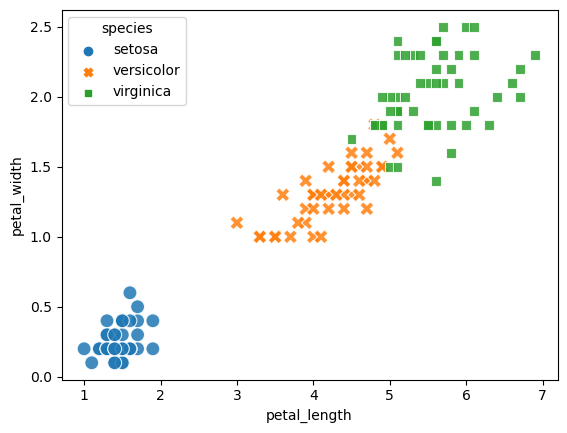

In [7]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', style='species', 
                alpha=0.85, edgecolor='w', s=100)
plt.show()

In [10]:
class_names = np.unique(df.species)
class_names
#print(np.unique(df.species))

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
#X and Y
X = df.drop('species',axis=1)
X.sample(6)

,sepal_length,sepal_width,petal_length,petal_width
51,6.4,3.2,4.5,1.5
113,5.7,2.5,5.0,2.0
88,5.6,3.0,4.1,1.3
19,5.1,3.8,1.5,0.3
114,5.8,2.8,5.1,2.4
6,4.6,3.4,1.4,0.3


In [31]:
y = df.species



In [32]:
def one_hot_encode(arr):
    categories, ids = np.unique(arr, return_inverse=True)
    print(categories)
    return pd.get_dummies(arr).to_numpy()
y_1h = one_hot_encode(y)

['setosa' 'versicolor' 'virginica']


In [33]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)
X_sc[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [34]:
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train_1h,Y_test_1h = train_test_split(X_sc,y_1h)
Y_train.shape,Y_test.shape

((112, 3), (38, 3))

In [36]:
#Model MLP Create
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [39]:
model = Sequential()

model.add(Dense(64,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.output_shape

(None, 3)

In [44]:
model.compile(loss='categorical_crossentropy',  # รองรับ Classification 3 class ขึ้นไป
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
import time

start = time.time()
history = model.fit(X_train,Y_train_1h,epochs=80,batch_size=64,verbose=1, validation_split=0.25)
end = time.time()

print(f"Time take {end - start:.3f} secs")

Epoch 1/80
2/2 [==============================] - 3s 817ms/step - loss: 1.3373 - accuracy: 0.3690 - val_loss: 1.2329 - val_accuracy: 0.4286
Epoch 2/80
2/2 [==============================] - 0s 95ms/step - loss: 1.2934 - accuracy: 0.3690 - val_loss: 1.1968 - val_accuracy: 0.4286
Epoch 3/80
2/2 [==============================] - 0s 94ms/step - loss: 1.2504 - accuracy: 0.3690 - val_loss: 1.1619 - val_accuracy: 0.4286
Epoch 4/80
2/2 [==============================] - 0s 89ms/step - loss: 1.2081 - accuracy: 0.3690 - val_loss: 1.1282 - val_accuracy: 0.4286
Epoch 5/80
2/2 [==============================] - 0s 94ms/step - loss: 1.1684 - accuracy: 0.3690 - val_loss: 1.0956 - val_accuracy: 0.4286
Epoch 6/80
2/2 [==============================] - 0s 115ms/step - loss: 1.1296 - accuracy: 0.3690 - val_loss: 1.0640 - val_accuracy: 0.3929
Epoch 7/80
2/2 [==============================] - 0s 108ms/step - loss: 1.0914 - accuracy: 0.3690 - val_loss: 1.0333 - val_accuracy: 0.3929
Epoch 8/80
2/2 [========

In [51]:
score = model.evaluate(X_test, Y_test_1h, verbose=1)

print("Test loss:", score[0])
print(f"Test accuracy: {score[1]:.4f}")

2/2 [==============================] - 0s 7ms/step - loss: 0.3633 - accuracy: 0.8947
Test loss: 0.36329153180122375
Test accuracy: 0.8947


In [54]:
model.metrics_names

['loss', 'accuracy']

In [61]:
y_pred = model.predict(X_test)

y_pred[:8].round(3)

2/2 [==============================] - 0s 7ms/step


array([[0.963, 0.024, 0.012],
       [0.093, 0.503, 0.405],
       [0.073, 0.425, 0.502],
       [0.977, 0.009, 0.014],
       [0.123, 0.753, 0.124],
       [0.938, 0.048, 0.013],
       [0.021, 0.083, 0.896],
       [0.009, 0.322, 0.67 ]], dtype=float32)

In [62]:
y_pred_cat = np.argmax(y_pred,axis=1)
y_pred_cat

array([0, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1], dtype=int64)

In [67]:
class_pred =class_names[y_pred_cat]
class_pred[5:10]

array(['setosa', 'virginica', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

In [96]:
y_test = np.argmax(y_test_1h,axis=1)
y_test = class_names[y_test]
_, y_test_enc = np.unique(y_test, return_inverse=True)  # Label encoding

class_names



array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_enc, y_pred_cat, target_names=class_names))
print(confusion_matrix(y_test_enc, y_pred_cat))

              precision    recall  f1-score   support

      setosa       0.45      0.36      0.40        14
  versicolor       0.31      0.40      0.35        10
   virginica       0.36      0.36      0.36        14

    accuracy                           0.37        38
   macro avg       0.37      0.37      0.37        38
weighted avg       0.38      0.37      0.37        38

[[5 4 5]
 [2 4 4]
 [4 5 5]]


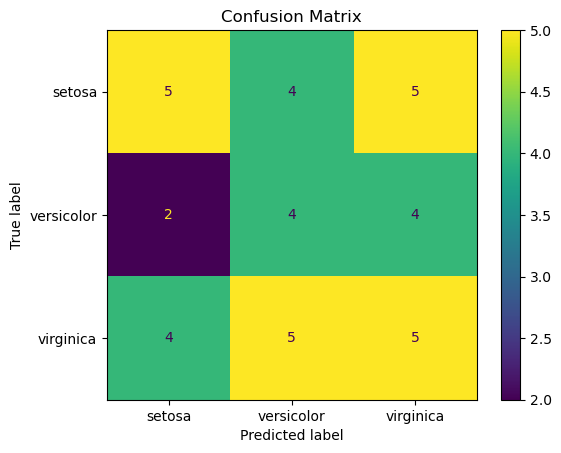

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_enc, y_pred_cat)   ## <-- 
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

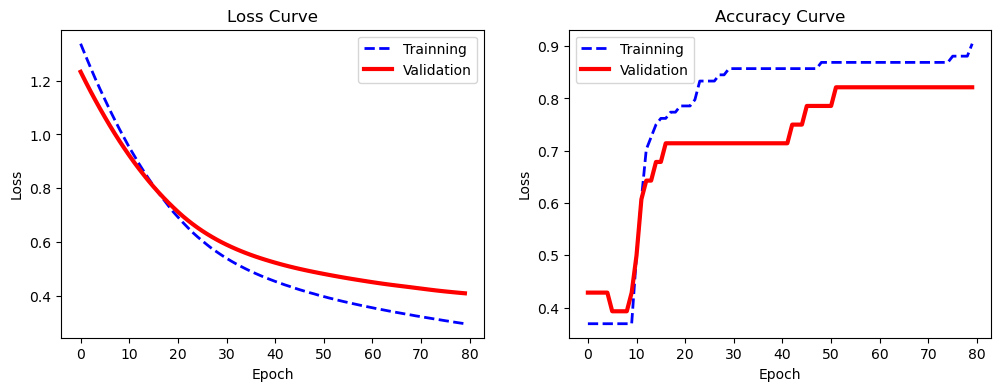

In [99]:
# 2 Columns
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)   # row column index
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')
plt.title('Loss Curve')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)   # row column index
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [100]:
X_new = [[8.1, 4.0, 5.9, 2.1], #  1
         [6.8, 3.6, 3.5, 1.4]] #  2

# X_new = [[8.1, 4.0, 5.9, 2.1]]

X_new_sc = sc.transform(X_new)
X_new_sc

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.73435494,  2.16998818,  1.21745768,  1.18556721],
       [ 1.15917263,  1.24920112, -0.14664056,  0.26414192]])

In [101]:
y_pred_pr = model.predict(X_new_sc)
y_pred_pr.round(3)

1/1 [==============================] - 0s 78ms/step


array([[0.007, 0.059, 0.934],
       [0.262, 0.297, 0.441]], dtype=float32)

In [102]:
y_pred = np.argmax(y_pred_pr, axis=1)
y_pred

array([2, 2], dtype=int64)

In [103]:
y_predi_c = class_names[y_pred]

In [104]:
y_predi_c

array(['virginica', 'virginica'], dtype=object)

In [106]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
    
model_no_ohe = Onehot2Int(model)    

9600/9600 [==============================] - 32s 3ms/step


NameError: name 'hidden_node' is not defined

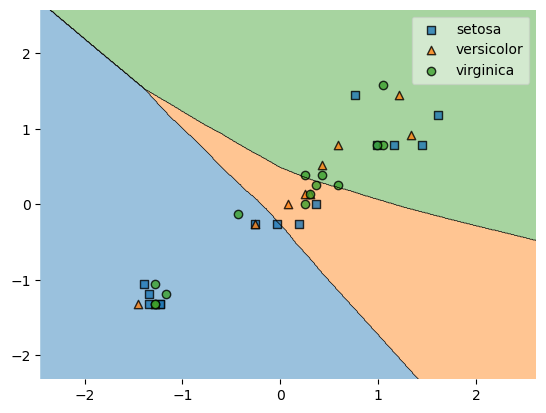

In [107]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 5.5

ax = plot_decision_regions(X_test, np.array(y_test_enc),

                    clf=model_no_ohe, feature_index=[2, 3],  
                    filler_feature_values={0: value, 1: value},
                    filler_feature_ranges={0: width, 1: width},
                    legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Iris (Hidden={})'.format(hidden_node))
# plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.scatter(X_new_sc[:,2][y_pred==0], X_new_sc[:,3][y_pred==0], marker='s', s=180, c='b')
plt.scatter(X_new_sc[:,2][y_pred==1], X_new_sc[:,3][y_pred==1], marker='^', s=230, c='#7d4128') # 
plt.scatter(X_new_sc[:,2][y_pred==2], X_new_sc[:,3][y_pred==2], marker='o', s=150, c='b')
plt.show()